# Time series analysis - Yearly

### Required imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.ar_model import AR
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import acf, adfuller
import statsmodels.api as sm
from sklearn.datasets import make_regression
import warnings
warnings.filterwarnings('ignore')

In [2]:
year_data=pd.read_csv('/Users/harinim/downloads/nity18442004.csv')
print(" Yearly")       # Figure 1
year_data

 Yearly


,x
0,8.5
1,8.3
2,9.7
3,8.9
4,8.5
...,...
156,9.2
157,8.8
158,9.5
159,9.3


## Data description and preprocessing

In [3]:
na_values=pd.DataFrame(year_data.isna().sum())
print("Yearly")       # Figure 3
na_values.head(25)

Yearly


,0
x,0


In [4]:
# Create a date range from January 1884 to December 2004
dates = pd.date_range(start='1844-01-01', end='2004-12-01', freq='YS')
yearly_data = pd.Series(year_data['x'], index=dates)
yearly_data = year_data.squeeze()
yearly_data.index = dates


In [5]:
print("    Yearly")       # Figure 3
pd.DataFrame(yearly_data.head())

    Yearly


,x
1844-01-01,8.5
1845-01-01,8.3
1846-01-01,9.7
1847-01-01,8.9
1848-01-01,8.5


In [6]:
print(yearly_data.info())

<class 'pandas.core.series.Series'>
DatetimeIndex: 161 entries, 1844-01-01 to 2004-01-01
Freq: AS-JAN
Series name: x
Non-Null Count  Dtype  
--------------  -----  
161 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB
None


In [7]:
print("    Yearly")    #Figure 2
pd.DataFrame(yearly_data.describe())

    Yearly


,x
count,161.000000
mean,8.488820
std,0.525475
min,6.700000
25%,8.200000
50%,8.500000
75%,8.800000
max,9.700000


In [8]:
# ADF TEST
adf_test = adfuller(yearly_data)
print('ADF test statistic:', adf_test[0])
print('p-value:', adf_test[1])
print('Critical values:', adf_test[4])

ADF test statistic: -1.3523756587488243
p-value: 0.6048831174332471
Critical values: {'1%': -3.473542528196209, '5%': -2.880497674144038, '10%': -2.576878053634677}


### Visualisation

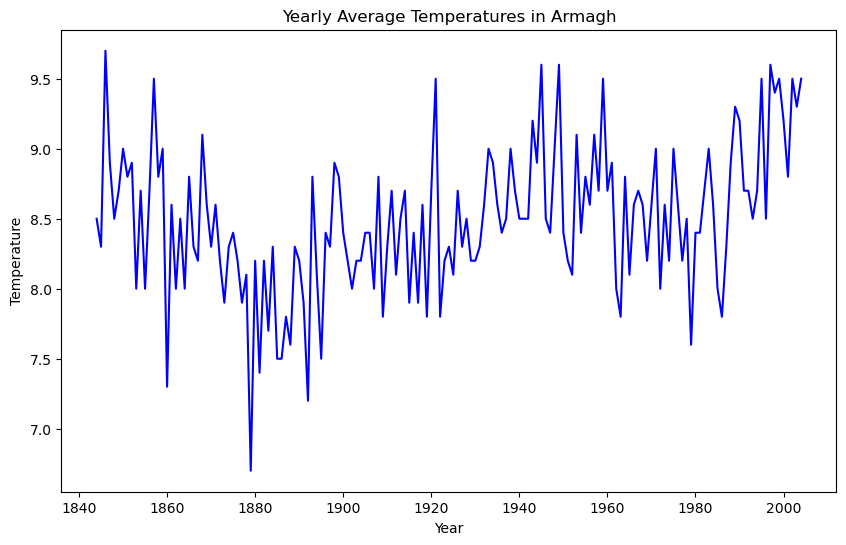

In [9]:

# plot the time series data    fig 6
plt.figure(figsize=(10, 6))
plt.plot(yearly_data, color='blue')
plt.title('Yearly Average Temperatures in Armagh')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

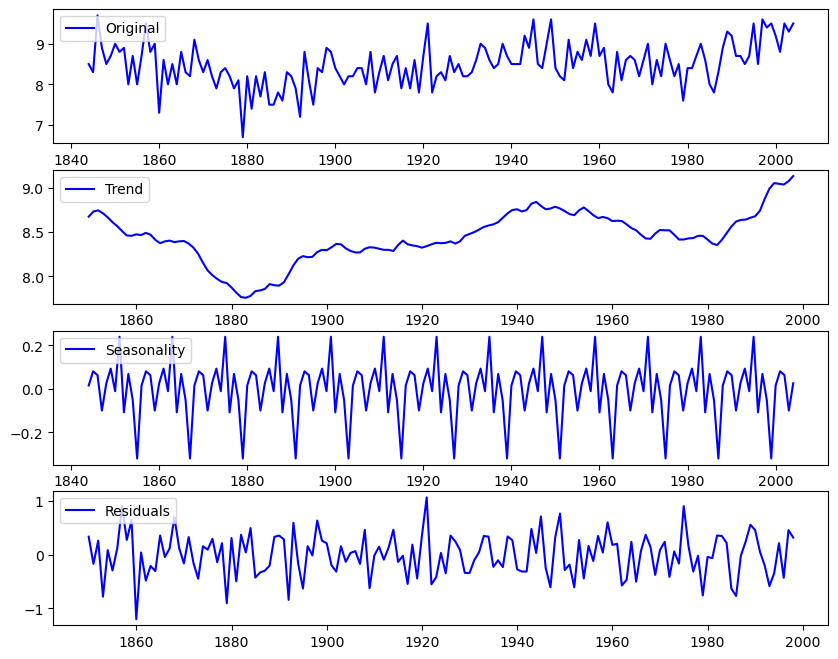

In [10]:
# plot the seasonal decomposition    fig 7
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(yearly_data, model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(yearly_data, label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='upper left')
plt.show()


<Figure size 1000x600 with 0 Axes>

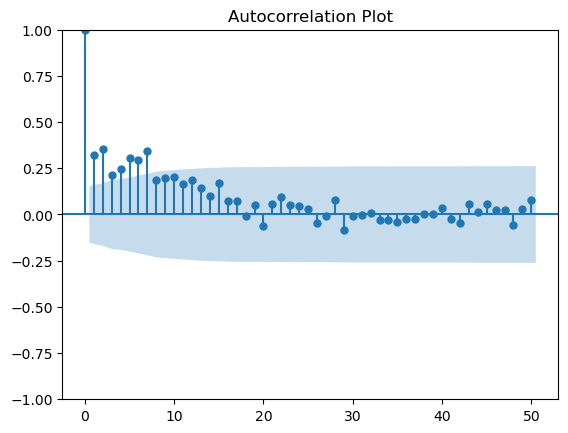

<Figure size 1000x600 with 0 Axes>

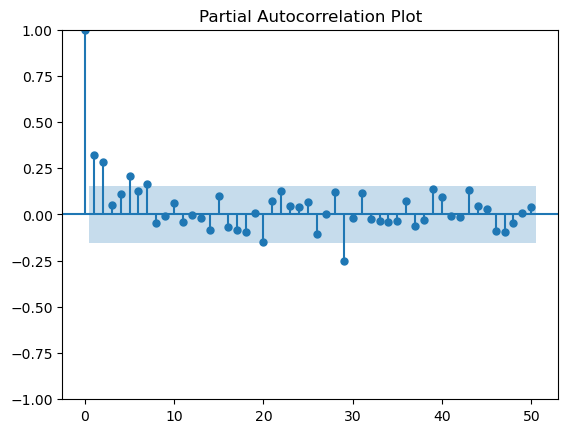

In [11]:
# plot the autocorrelation and partial autocorrelation   fig 8
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 6))
plot_acf(yearly_data, lags=50)
plt.title('Autocorrelation Plot')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(yearly_data, lags=50)
plt.title('Partial Autocorrelation Plot')
plt.show()

In [12]:
# Split train and test

yearly_train = yearly_data.loc[:'2003']
yearly_test = yearly_data.loc['2004']


##Exponential smoothing

In [13]:
# Exponential smoothing
model_es = ExponentialSmoothing(yearly_train, trend='add', seasonal='add', seasonal_periods=12)
fit_es = model_es.fit()
forecast_es = fit_es.forecast(len(yearly_test))
#hot linear
model_holt = ExponentialSmoothing(yearly_train,trend='add', damped=False)
fit_holt= model_holt.fit()
predictions_holt = fit_holt.forecast(len(yearly_test))
#holt winter
# fit model
model_hw = ExponentialSmoothing(yearly_train, seasonal_periods=12, trend='add', seasonal='add',damped=True)
fit_hw=model_hw.fit()
predictions_hw = fit_hw.forecast(len(yearly_test))
#damped trend
# fit model
model_damped = ExponentialSmoothing(yearly_train, trend='add', damped=True).fit()
predictions_damped = model_damped.forecast(len(yearly_test))

In [14]:
# SARIMAX
model_sarima = SARIMAX(yearly_train, order=(0, 2, 2), seasonal_order=(0, 2, 2, 12), enforce_stationarity=False, 
                       enforce_invertibility=False)
fit_sarima = model_sarima.fit()
forecast_sarima = fit_sarima.forecast(len(yearly_test))

model_arima = ARIMA(yearly_train, order=(0, 1, 1))#, seasonal_order=(0, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
fit_arima = model_arima.fit()
forecast_arima = fit_arima.forecast(len(yearly_test))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.68481D-01    |proj g|=  3.38258D-01


 This problem is unconstrained.



At iterate    5    f=  6.64227D-01    |proj g|=  1.01047D-01

At iterate   10    f=  5.89548D-01    |proj g|=  1.10653D-02

At iterate   15    f=  5.89449D-01    |proj g|=  1.41613D-02

At iterate   20    f=  5.89385D-01    |proj g|=  2.78893D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     31      1     0     0   7.612D-05   5.894D-01
  F =  0.58938528339880580     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [15]:
#Simple time series models
model_ses = SimpleExpSmoothing(yearly_train)
fit_ses= model_ses.fit()
pred_ses = fit_ses.forecast(len(yearly_test))

#random walk
result = seasonal_decompose(yearly_train, model='additive', period=12)
seasonal = result.seasonal
forecast_rw = yearly_test.shift(1)

# fit and forecast using Seasonal Naive model
seasonal_naive_model = sm.tsa.UnobservedComponents(yearly_train, 'local level', seasonal=12)
fit_snaive=seasonal_naive_model.fit()
forecast_snaive = fit_snaive.forecast(steps=len(yearly_test))



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.99629D-01    |proj g|=  7.01614D-01

At iterate    5    f=  8.39215D-01    |proj g|=  4.99844D-01

At iterate   10    f=  6.82158D-01    |proj g|=  3.34386D-02

At iterate   15    f=  6.82086D-01    |proj g|=  9.07049D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     33      1     0     0   1.956D-05   6.821D-01
  F =  0.68208577758974942     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


In [16]:
forecast_rw = forecast_rw.fillna(0)

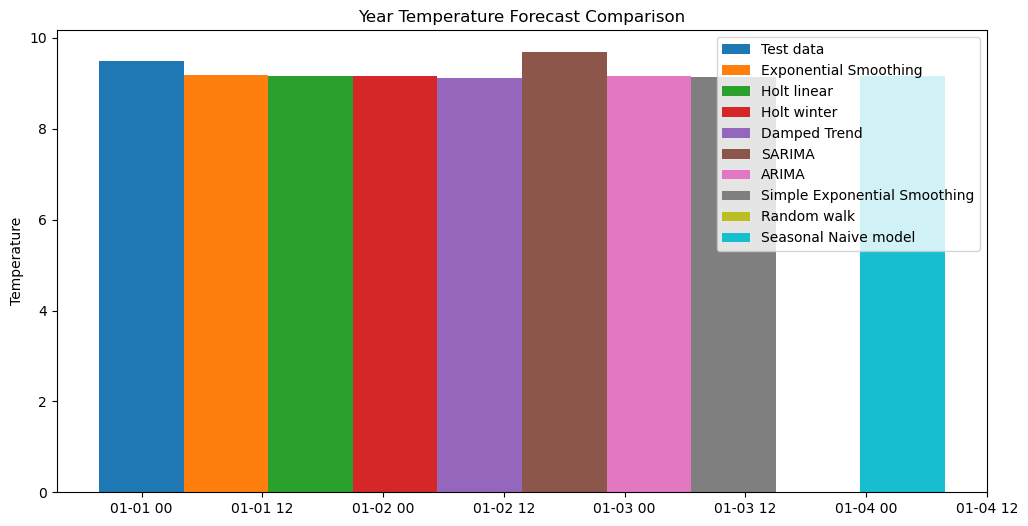

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt


# set the figure size and the width of the bars
plt.figure(figsize=(12, 6))
bar_width = 0.35

# plot the actual and predicted values as bars
plt.bar(yearly_test.index, yearly_test.values, width=bar_width, label='Test data')
plt.bar(forecast_es.index + dt.timedelta(days=1)*bar_width, forecast_es.values, width=bar_width, label='Exponential Smoothing')
plt.bar(predictions_holt.index + dt.timedelta(days=1)*bar_width*2, predictions_holt.values, width=bar_width, label='Holt linear')
plt.bar(predictions_hw.index + dt.timedelta(days=1)*bar_width*3, predictions_hw.values, width=bar_width, label='Holt winter')
plt.bar(predictions_damped.index + dt.timedelta(days=1)*bar_width*4, predictions_damped.values, width=bar_width, label='Damped Trend')
plt.bar(forecast_sarima.index + dt.timedelta(days=1)*bar_width*5, forecast_sarima.values, width=bar_width, label='SARIMA')
plt.bar(forecast_arima.index + dt.timedelta(days=1)*bar_width*6, forecast_arima.values, width=bar_width, label='ARIMA')
plt.bar(pred_ses.index + dt.timedelta(days=1)*bar_width*7, pred_ses.values, width=bar_width, label='Simple Exponential Smoothing')
plt.bar(forecast_rw.index + dt.timedelta(days=1)*bar_width*8, forecast_rw.values, width=bar_width, label='Random walk')
plt.bar(forecast_snaive.index + dt.timedelta(days=1)*bar_width*9, forecast_snaive.values, width=bar_width, label='Seasonal Naive model')
plt.ylabel('Temperature')
plt.title('Year Temperature Forecast Comparison')
plt.legend()
plt.show()


In [18]:
# Calculate and display evaluation metrics  fig 9

mse_es = mean_squared_error(yearly_test, forecast_es)
mae_es = mean_absolute_error(yearly_test, forecast_es)
r2_es = r2_score(yearly_test, forecast_es)
rmse_es = mean_squared_error(yearly_test, forecast_es, squared=False)
mape_es = mean_absolute_percentage_error(yearly_test, forecast_es)

mse_hl = mean_squared_error(yearly_test, predictions_holt)
mae_hl = mean_absolute_error(yearly_test, predictions_holt)
r2_hl = r2_score(yearly_test, predictions_holt)
rmse_hl = mean_squared_error(yearly_test, predictions_holt, squared=False)
mape_hl = mean_absolute_percentage_error(yearly_test, predictions_holt)

mse_hw = mean_squared_error(yearly_test, predictions_hw)
mae_hw = mean_absolute_error(yearly_test, predictions_hw)
r2_hw = r2_score(yearly_test, predictions_hw)
rmse_hw = mean_squared_error(yearly_test, predictions_hw, squared=False)
mape_hw = mean_absolute_percentage_error(yearly_test, predictions_hw)

mse_d = mean_squared_error(yearly_test, predictions_damped)
mae_d = mean_absolute_error(yearly_test, predictions_damped)
r2_d = r2_score(yearly_test, predictions_damped)
rmse_d = mean_squared_error(yearly_test, predictions_damped, squared=False)
mape_d = mean_absolute_percentage_error(yearly_test, predictions_damped)

############################################################################
mse_sarima = mean_squared_error(yearly_test, forecast_sarima)
mae_sarima = mean_absolute_error(yearly_test, forecast_sarima)
r2_sarima = r2_score(yearly_test, forecast_sarima)
rmse_sarima = mean_squared_error(yearly_test, forecast_sarima, squared=False)
mape_sarima = mean_absolute_percentage_error(yearly_test, forecast_sarima)

mse_arima = mean_squared_error(yearly_test, forecast_arima)
mae_arima = mean_absolute_error(yearly_test, forecast_arima)
r2_arima = r2_score(yearly_test, forecast_arima)
rmse_arima = mean_squared_error(yearly_test, forecast_arima, squared=False)
mape_arima = mean_absolute_percentage_error(yearly_test, forecast_arima)


##################################################################################
mse_ses = mean_squared_error(yearly_test, pred_ses)
mae_ses = mean_absolute_error(yearly_test, pred_ses)
r2_ses = r2_score(yearly_test, pred_ses)
rmse_ses = mean_squared_error(yearly_test, pred_ses, squared=False)
mape_ses = mean_absolute_percentage_error(yearly_test, pred_ses)

mse_rw = mean_squared_error(yearly_test, forecast_rw)
mae_rw = mean_absolute_error(yearly_test, forecast_rw)
r2_rw = r2_score(yearly_test, forecast_rw)
rmse_rw = mean_squared_error(yearly_test, forecast_rw, squared=False)
mape_rw = mean_absolute_percentage_error(yearly_test, forecast_rw)

mse_sn = mean_squared_error(yearly_test, forecast_snaive)
mae_sn = mean_absolute_error(yearly_test, forecast_snaive)
r2_sn = r2_score(yearly_test, forecast_snaive)
rmse_sn = mean_squared_error(yearly_test, forecast_snaive, squared=False)
mape_sn = mean_absolute_percentage_error(yearly_test, forecast_snaive)

# Evaluate the models based on the evaluation metrics
metrics = pd.DataFrame({
    'Exponential Smoothing': [mse_es, mae_es, r2_es, rmse_es, mape_es],
                      'Holt Linear': [mse_hl, mae_hl, r2_hl, rmse_hl, mape_hl],
                      'Holt winter': [mse_hw, mae_hw, r2_hw, rmse_hw, mape_hw],
                     'Damped trend': [mse_d, mae_d, r2_d, rmse_d, mape_d],
                        'SARIMA': [mse_sarima, mae_sarima, r2_sarima, rmse_sarima, mape_sarima],
                        'ARIMA': [mse_arima, mae_arima, r2_arima, rmse_arima, mape_arima],
                        'SEASONAL NAIVE': [mse_sn, mae_sn, r2_sn, rmse_sn, mape_sn],
                        'Random walking': [mse_rw, mae_rw, r2_rw, rmse_rw, mape_rw],
                       'Simple Exponential Smoothing': [mse_ses, mae_ses, r2_ses, rmse_ses, mape_ses]},
                       index=['MSE', 'MAE', 'R2','RMSE','MAPE'])

metrics

,Exponential Smoothing,Holt Linear,Holt winter,Damped trend,SARIMA,ARIMA,SEASONAL NAIVE,Random walking,Simple Exponential Smoothing
MSE,0.096422,0.112850,0.121867,0.143347,0.033813,0.119338,0.109231,90.25,0.123539
MAE,0.310519,0.335932,0.349094,0.378612,0.183883,0.345453,0.330501,9.50,0.351481
R2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RMSE,0.310519,0.335932,0.349094,0.378612,0.183883,0.345453,0.330501,9.50,0.351481
MAPE,0.032686,0.035361,0.036747,0.039854,0.019356,0.036363,0.034790,1.00,0.036998


In [19]:
# AIC stands for Akaike Information Criterion and BIC stands for Bayesian Information Criterion.
aic = fit_es.aic
bic = fit_es.bic

print('exponential smoothing AIC:', aic)
print('exponential smoothing BIC:', bic)

aic = fit_hw.aic
bic = fit_hw.bic

print('Holt winter AIC:', aic)
print('Holt winter BIC:', bic)

aic = fit_sarima.aic
bic = fit_sarima.bic

print('SARIMA AIC:', aic)
print('SARIMA BIC:', bic)

aic = fit_snaive.aic
bic = fit_snaive.bic

print('Seasonal Naive AIC:', aic)
print('Seasonal Naive BIC:', bic)



exponential smoothing AIC: -229.96598919547773
exponential smoothing BIC: -180.7632081517365
Holt winter AIC: -229.14711060736903
Holt winter BIC: -176.86915574839398
SARIMA AIC: 198.60329068761786
SARIMA BIC: 211.96743485992738
Seasonal Naive AIC: 224.2674488287198
Seasonal Naive BIC: 233.25908565001214


In [20]:
# Choose the best model based on the evaluation metrics
best_model = metrics.idxmin(axis=1)[0]
print('The best model is:', best_model)


The best model is: SARIMA


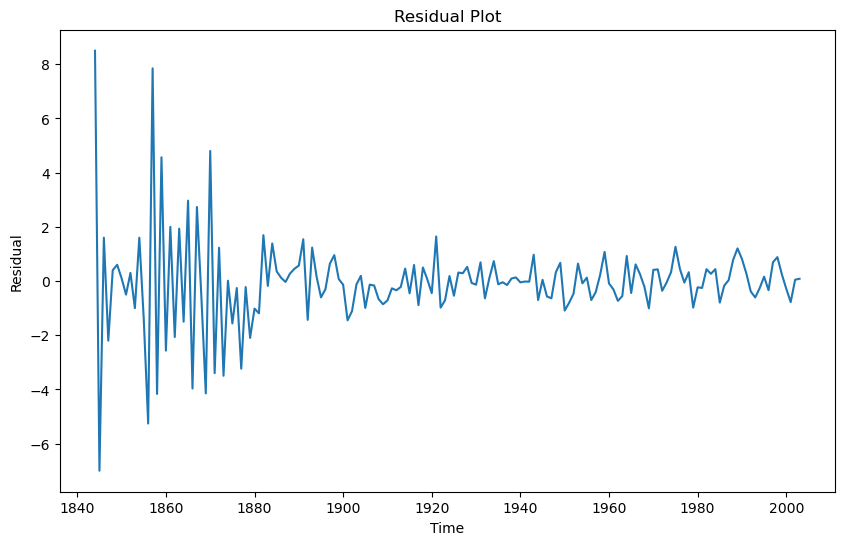

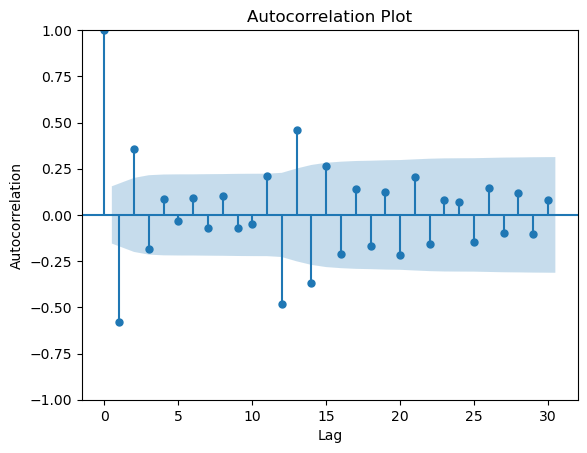

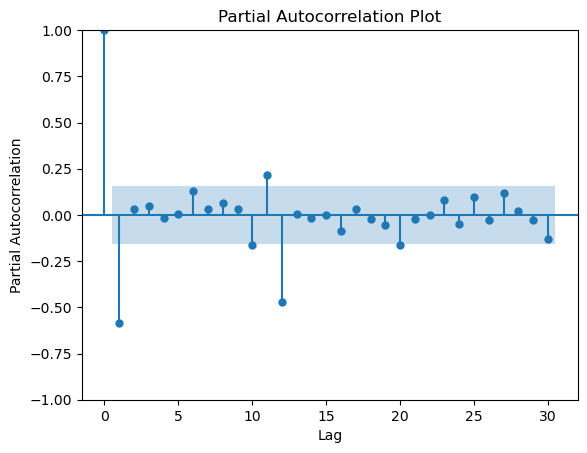

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Get the residuals
residuals = pd.Series(fit_sarima.resid)

# Create the residual plot
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residual Plot')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.show()
########
plot_acf(residuals, lags=30)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()
# Create the partial autocorrelation plot
plot_pacf(residuals, lags=30)
plt.title('Partial Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


## Tests

In [22]:
from statsmodels.stats.stattools import jarque_bera

# Perform Jarque-Bera test
_, pvalue, _, _ = jarque_bera(residuals)
print(pvalue)

# Check normality assumption
if pvalue < 0.05:
    print('The residuals are not normally distributed.')
else:
    print('The residuals are normally distributed.')


5.50226925286079e-116
The residuals are not normally distributed.


In [23]:
dwtest = durbin_watson(forecast_es)

# Print the Durbin-Watson statistic and p-value
print(f'Durbin-Watson statistic: {dwtest:.2f}')
if dwtest < 2 or dwtest > 4:
    print('Autocorrelation is present')

Durbin-Watson statistic: 0.00
Autocorrelation is present


## Forcast results

In [24]:
model_es = ExponentialSmoothing(yearly_data, trend='add', seasonal='add', seasonal_periods=12)
fit_es = model_es.fit()
forecast_es = fit_es.forecast(len(yearly_test))
   
print('Forecasts for the next 12 months:\n', forecast_es)


Forecasts for the next 12 months:
 2005-01-01    9.33305
Freq: AS-JAN, dtype: float64
